In [2]:
import pandas as pd
from datetime import datetime
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
from MCForecastTools import MCSimulation
from pathlib import Path

%matplotlib inline

In [3]:
data = yf.download("BTC-USD, ETH-USD, DOGE-USD, XMR-USD, XEM-USD, BNB-USD" 
                   , start="2018-01-01", end="2022-10-26")


[*********************100%***********************]  6 of 6 completed


In [4]:
data_df = pd.DataFrame(data)
data_df = data_df.drop(columns = ['Adj Close', 'High', 'Low', 'Open', 'Volume'])
data_df.tail()

Close                                                 \
               BNB-USD       BTC-USD  DOGE-USD      ETH-USD   XEM-USD   
Date                                                                    
2022-10-21  270.038422  19172.468750  0.059334  1299.946411  0.037247   
2022-10-22  270.479492  19208.189453  0.059694  1314.299194  0.037396   
2022-10-23  276.008179  19567.007812  0.060347  1363.447021  0.038073   
2022-10-24  273.977417  19345.572266  0.059506  1344.998535  0.037619   
2022-10-25  284.432526  20095.857422  0.062882  1461.665405  0.038556   

                        
               XMR-USD  
Date                    
2022-10-21  140.729477  
2022-10-22  142.801865  
2022-10-23  144.488083  
2022-10-24  143.225418  
2022-10-25  144.185669

In [5]:
data_df.isna().sum()

Close  BNB-USD     0
       BTC-USD     0
       DOGE-USD    0
       ETH-USD     0
       XEM-USD     0
       XMR-USD     0
dtype: int64

In [6]:
daily_change = data_df.pct_change()
daily_change.tail()

Close                                                  
             BNB-USD   BTC-USD  DOGE-USD   ETH-USD   XEM-USD   XMR-USD
Date                                                                  
2022-10-21  0.002849  0.006231 -0.003393  0.013050  0.010636 -0.003386
2022-10-22  0.001633  0.001863  0.006067  0.011041  0.004000  0.014726
2022-10-23  0.020440  0.018680  0.010939  0.037395  0.018104  0.011808
2022-10-24 -0.007358 -0.011317 -0.013936 -0.013531 -0.011924 -0.008739
2022-10-25  0.038160  0.038783  0.056734  0.086741  0.024908  0.006704

<AxesSubplot:xlabel='Date'>

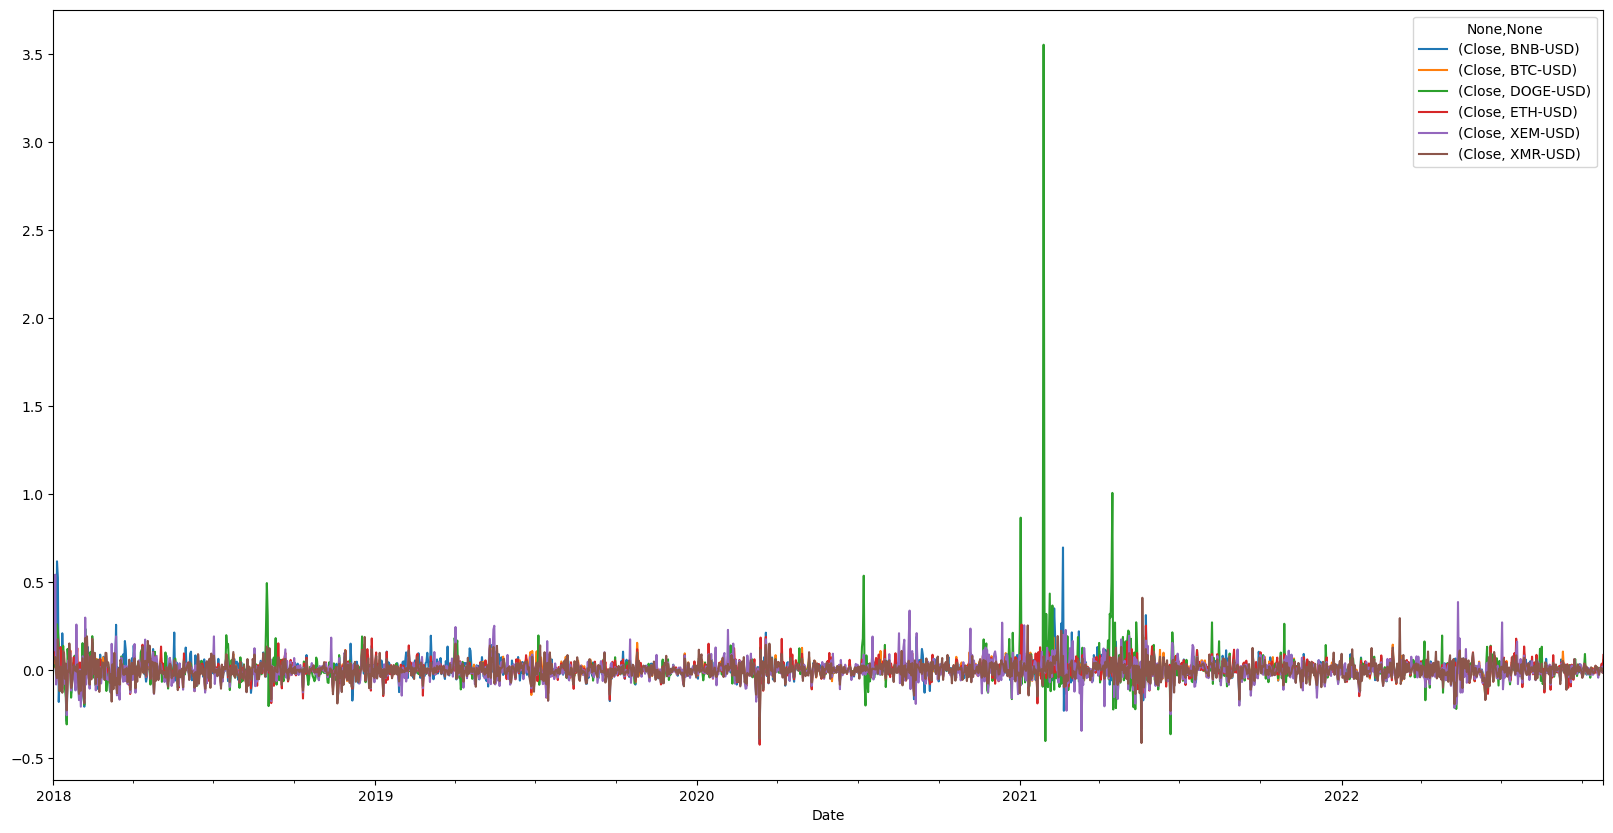

In [7]:
daily_change.plot(figsize=(20,10))

In [8]:
daily_change.describe()

Close                                                      \
           BNB-USD      BTC-USD     DOGE-USD      ETH-USD      XEM-USD   
count  1758.000000  1758.000000  1758.000000  1758.000000  1758.000000   
mean      0.003677     0.000982     0.004653     0.001647     0.000037   
std       0.059148     0.038729     0.111696     0.050178     0.062168   
min      -0.419046    -0.371695    -0.402570    -0.423472    -0.344734   
25%      -0.021774    -0.015838    -0.024116    -0.022255    -0.029321   
50%       0.000861     0.001165    -0.001279     0.000797     0.000487   
75%       0.027529     0.017665     0.019117     0.027014     0.026668   
max       0.697604     0.187465     3.555466     0.259475     0.543105   

                    
           XMR-USD  
count  1758.000000  
mean      0.000926  
std       0.053199  
min      -0.413860  
25%      -0.024447  
50%       0.001702  
75%       0.028358  
max       0.411925

In [9]:
average = daily_change.mean()
average = average.sort_values()
average

Close  XEM-USD     0.000037
       XMR-USD     0.000926
       BTC-USD     0.000982
       ETH-USD     0.001647
       BNB-USD     0.003677
       DOGE-USD    0.004653
dtype: float64

In [10]:
std = daily_change.std()
std = std.sort_values()
std

Close  BTC-USD     0.038729
       ETH-USD     0.050178
       XMR-USD     0.053199
       BNB-USD     0.059148
       XEM-USD     0.062168
       DOGE-USD    0.111696
dtype: float64

In [11]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + daily_change).cumprod()
cumulative_returns.head()

Close                                                  
             BNB-USD   BTC-USD  DOGE-USD   ETH-USD   XEM-USD   XMR-USD
Date                                                                  
2018-01-01       NaN       NaN       NaN       NaN       NaN       NaN
2018-01-02  1.050289  1.097011  1.026490  1.144702  1.114090  1.068044
2018-01-03  1.133253  1.113039  1.046133  1.246012  1.719158  1.147840
2018-01-04  1.094999  1.142196  1.082501  1.269570  1.579467  1.122728
2018-01-05  1.772774  1.276213  1.365698  1.291311  1.528554  1.072275

<AxesSubplot:xlabel='Date'>

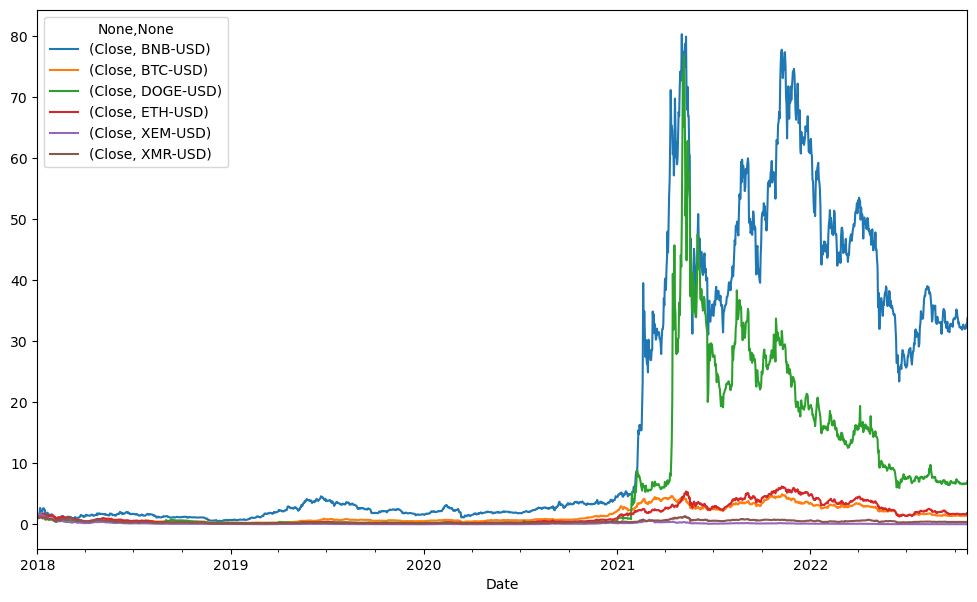

In [12]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(12,7))

<AxesSubplot:xlabel='None-None', ylabel='None-None'>

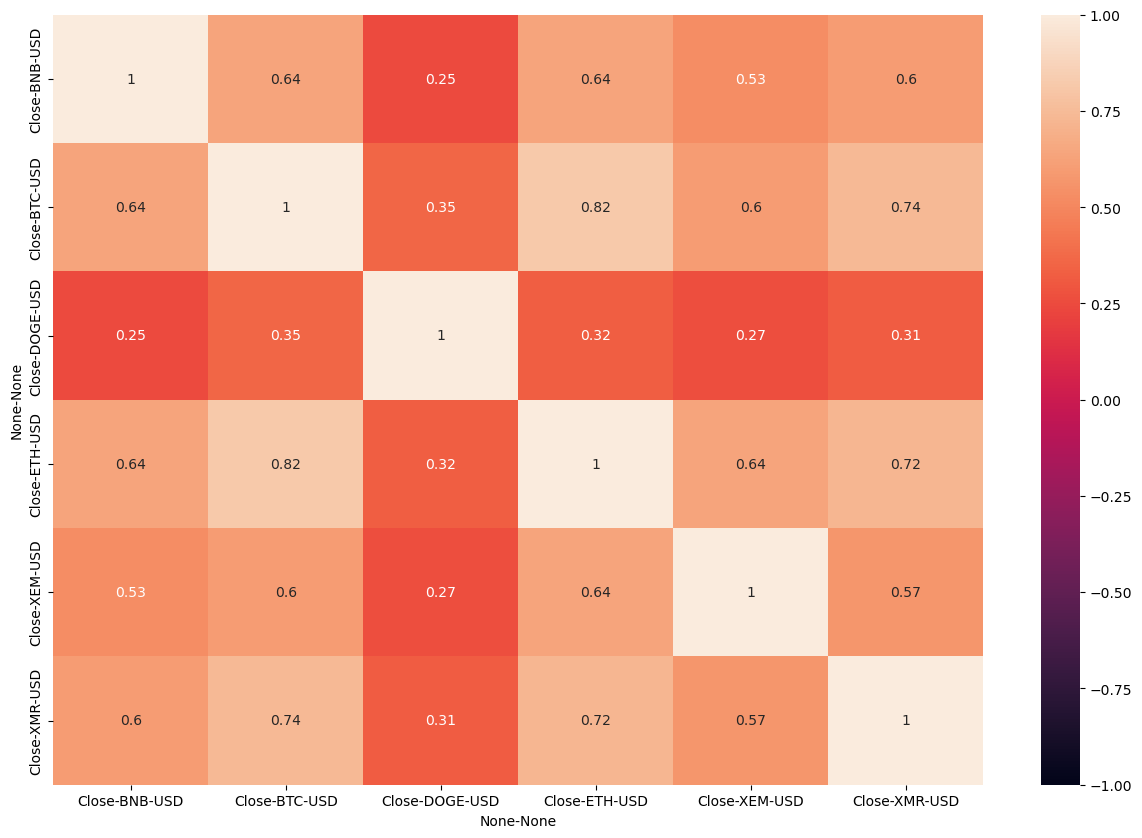

In [13]:
# Calculate the correlation
correlation = daily_change.corr()
# Display correlation matrix
plt.figure(figsize = (15,10))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)

In [14]:
# Use yahoofinance API to pull BTC data and clean dataframe
btc = yf.download("BTC-USD" 
                   , start="2018-01-01", end="2022-10-26")

btc = pd.concat([btc], axis=1, keys=["BTC"])
btc.rename(columns = {"Open": "open", "High" : "high", "Low" : "low", "Close" : "close", "Adj Close" : "adj close", "Volume" : "volume"}, inplace = True)

# Use yahoofinance API to pull ETH data and clean dataframe
eth = yf.download("ETH-USD" 
                   , start="2018-01-01", end="2022-10-26")

eth = pd.concat([eth], axis=1, keys=["ETH"])
eth.rename(columns = {"Open": "open", "High" : "high", "Low" : "low", "Close" : "close", "Adj Close" : "adj close", "Volume" : "volume"}, inplace = True)


# Use yahoofinance API to pull DOGE data and clean dataframe
doge = yf.download("DOGE-USD" 
                   , start="2018-01-01", end="2022-10-26")

doge = pd.concat([doge], axis=1, keys=["DOGE"])
doge.rename(columns = {"Open": "open", "High" : "high", "Low" : "low", "Close" : "close", "Adj Close" : "adj close", "Volume" : "volume"}, inplace = True)

# Use yahoofinance API to pull BNB data and clean dataframe
bnb = yf.download("BNB-USD" 
                   , start="2018-01-01", end="2022-10-26")

bnb = pd.concat([bnb], axis=1, keys=["BNB"])
bnb.rename(columns = {"Open": "open", "High" : "high", "Low" : "low", "Close" : "close", "Adj Close" : "adj close", "Volume" : "volume"}, inplace = True)

# Use yahoofinance API to pull XEM data and clean dataframe
xem = yf.download("XEM-USD" 
                   , start="2018-01-01", end="2022-10-26")

xem = pd.concat([xem], axis=1, keys=["XEM"])
xem.rename(columns = {"Open": "open", "High" : "high", "Low" : "low", "Close" : "close", "Adj Close" : "adj close", "Volume" : "volume"}, inplace = True)

# Use yahoofinance API to pull XMR data and clean dataframe
xmr = yf.download("XMR-USD" 
                   , start="2018-01-01", end="2022-10-26")

xmr = pd.concat([xmr], axis=1, keys=["XMR"])
xmr.rename(columns = {"Open": "open", "High" : "high", "Low" : "low", "Close" : "close", "Adj Close" : "adj close", "Volume" : "volume"}, inplace = True)

xmr.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


XMR                                                  \
                  open        high         low       close   adj close   
Date                                                                     
2018-01-01  349.549011  363.787994  336.977997  358.989990  358.989990   
2018-01-02  359.059998  387.790009  359.059998  383.416992  383.416992   
2018-01-03  382.743988  418.257996  378.856995  412.062988  412.062988   
2018-01-04  414.410004  419.717987  383.540009  403.048004  403.048004   
2018-01-05  402.384003  407.035004  373.891998  384.936005  384.936005   

                       
               volume  
Date                   
2018-01-01  110244000  
2018-01-02  224768992  
2018-01-03  180190000  
2018-01-04  166108000  
2018-01-05  182618000

In [15]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast 60 days daily returns
mc_btc = MCSimulation(
    portfolio_data = btc,
    num_simulation = num_sims,
    num_trading_days = 60
)

# Configure a Monte Carlo simulation to forecast 60 days daily returns
mc_eth = MCSimulation(
    portfolio_data = eth,
    num_simulation = num_sims,
    num_trading_days = 60
)

# Configure a Monte Carlo simulation to forecast 60 days daily returns
mc_doge = MCSimulation(
    portfolio_data = doge,
    num_simulation = num_sims,
    num_trading_days = 60
)

# Configure a Monte Carlo simulation to forecast 60 days daily returns
mc_bnb = MCSimulation(
    portfolio_data = bnb,
    num_simulation = num_sims,
    num_trading_days = 60
)

# Configure a Monte Carlo simulation to forecast 60 days daily returns
mc_xem = MCSimulation(
    portfolio_data = xem,
    num_simulation = num_sims,
    num_trading_days = 60
)

# Configure a Monte Carlo simulation to forecast 60 days daily returns
mc_xmr = MCSimulation(
    portfolio_data = xmr,
    num_simulation = num_sims,
    num_trading_days = 60
)

In [16]:
# Run monte carlo simulations for all tickers
mc_btc.calc_cumulative_return()
mc_eth.calc_cumulative_return()
mc_doge.calc_cumulative_return()
mc_bnb.calc_cumulative_return()
mc_xem.calc_cumulative_return()
mc_xmr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.


C:\Users\Lucas\Desktop\fintech_project_1\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Monte Carlo simulation number 350.
Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.
Running Monte Carlo simulation number 400.
Running Monte Carlo simulation number 410.
Running Monte Carlo simulation number 420.
Running Mon

0         1         2         3         4         5         6    \
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1   0.948790  1.000478  0.978903  0.908218  1.020295  0.918262  1.079100   
2   0.893245  0.880735  1.005664  0.903283  1.064554  0.936660  1.117300   
3   0.867358  0.870447  1.016032  0.956978  1.006321  0.915120  1.142612   
4   0.774608  0.810477  0.927452  1.024584  0.980204  0.924389  1.059186   
..       ...       ...       ...       ...       ...       ...       ...   
56  0.644937  0.836425  0.649842  0.823826  1.517669  0.692000  0.643804   
57  0.700792  0.800221  0.695253  0.835939  1.548928  0.714891  0.638713   
58  0.697022  0.886743  0.737288  0.784318  1.582670  0.735957  0.655890   
59  0.714843  0.882544  0.815032  0.824274  1.519408  0.791054  0.653572   
60  0.701224  0.943577  0.729888  0.788783  1.667253  0.776152  0.566468   

         7         8         9    ...       990       991       992       993  \
0   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1   0.976469  1.043456  1.064963  ...  0.994301  1.017264  0.908718  1.035381   
2   0.988166  1.127127  1.098718  ...  0.991899  1.017694  0.897209  1.087622   
3   0.983302  1.205624  1.199924  ...  0.940464  0.977160  0.938234  1.059872   
4   0.954919  1.154192  1.174638  ...  0.924428  1.027519  0.873457  1.076273   
..       ...       ...       ...  ...       ...       ...       ...       ...   
56  0.972635  1.359761  1.345337  ...  1.203146  1.011426  1.347166  0.694163   
57  0.964483  1.432591  1.330252  ...  1.152811  1.027929  1.349111  0.710762   
58  0.962990  1.584965  1.280513  ...  1.096010  1.073148  1.420814  0.707707   
59  0.959002  1.556178  1.269547  ...  1.092413  1.094183  1.406728  0.792976   
60  0.956870  1.482166  1.329089  ...  1.153856  1.151182  1.341193  0.815508   

         994       995       996       997       998       999  
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1   0.938133  1.028738  1.030450  0.989085  0.963762  1.048602  
2   0.857506  1.087254  1.142151  0.972933  0.987186  1.097022  
3   0.910889  1.042454  1.173361  1.020536  0.973497  1.012732  
4   0.928121  1.017088  1.195051  0.986504  1.023892  1.042505  
..       ...       ...       ...       ...       ...       ...  
56  1.225281  0.740653  0.754032  0.617232  0.525285  1.273950  
57  1.121948  0.729312  0.708902  0.675159  0.544797  1.294681  
58  1.045988  0.726147  0.689181  0.638767  0.544275  1.182172  
59  1.111572  0.695028  0.645406  0.584974  0.521785  1.092400  
60  1.143789  0.740827  0.643948  0.590769  0.538050  1.205834  

[61 rows x 1000 columns]

In [17]:
# Compute summary statistics from the simulated daily returns
simulated_btc_returns_data = {
    "mean": list(mc_btc.simulated_return.mean(axis=1)),
    "median": list(mc_btc.simulated_return.median(axis=1)),
    "min": list(mc_btc.simulated_return.min(axis=1)),
    "max": list(mc_btc.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
btc_simulated_returns = pd.DataFrame(simulated_btc_returns_data)

# Compute summary statistics from the simulated daily returns
simulated_eth_returns_data = {
    "mean": list(mc_eth.simulated_return.mean(axis=1)),
    "median": list(mc_eth.simulated_return.median(axis=1)),
    "min": list(mc_eth.simulated_return.min(axis=1)),
    "max": list(mc_eth.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
eth_simulated_returns = pd.DataFrame(simulated_eth_returns_data)

# Compute summary statistics from the simulated daily returns
simulated_doge_returns_data = {
    "mean": list(mc_doge.simulated_return.mean(axis=1)),
    "median": list(mc_doge.simulated_return.median(axis=1)),
    "min": list(mc_doge.simulated_return.min(axis=1)),
    "max": list(mc_doge.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
doge_simulated_returns = pd.DataFrame(simulated_doge_returns_data)

# Compute summary statistics from the simulated daily returns
simulated_bnb_returns_data = {
    "mean": list(mc_bnb.simulated_return.mean(axis=1)),
    "median": list(mc_bnb.simulated_return.median(axis=1)),
    "min": list(mc_bnb.simulated_return.min(axis=1)),
    "max": list(mc_bnb.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
bnb_simulated_returns = pd.DataFrame(simulated_bnb_returns_data)

# Compute summary statistics from the simulated daily returns
simulated_xem_returns_data = {
    "mean": list(mc_xem.simulated_return.mean(axis=1)),
    "median": list(mc_xem.simulated_return.median(axis=1)),
    "min": list(mc_xem.simulated_return.min(axis=1)),
    "max": list(mc_xem.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
xem_simulated_returns = pd.DataFrame(simulated_xem_returns_data)

# Compute summary statistics from the simulated daily returns
simulated_xmr_returns_data = {
    "mean": list(mc_xmr.simulated_return.mean(axis=1)),
    "median": list(mc_xmr.simulated_return.median(axis=1)),
    "min": list(mc_xmr.simulated_return.min(axis=1)),
    "max": list(mc_xmr.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
xmr_simulated_returns = pd.DataFrame(simulated_xmr_returns_data)

<AxesSubplot:title={'center':'Simulated Cumulative Return Behavior of XMR Over the Next 5 Years'}>

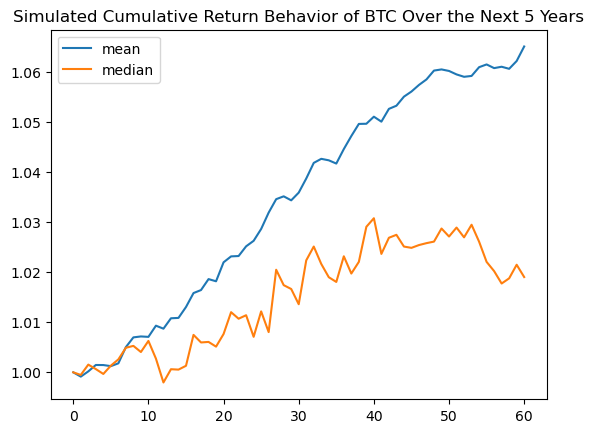

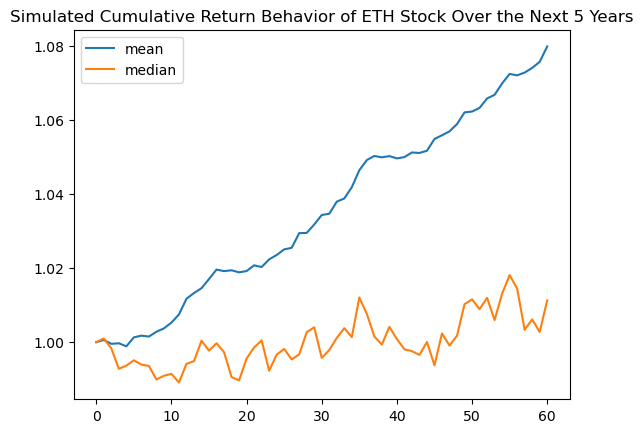

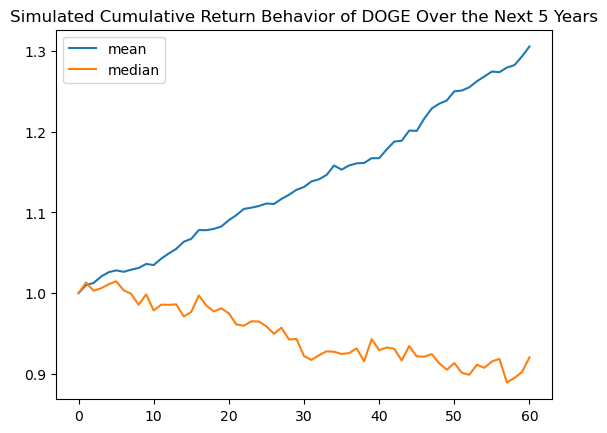

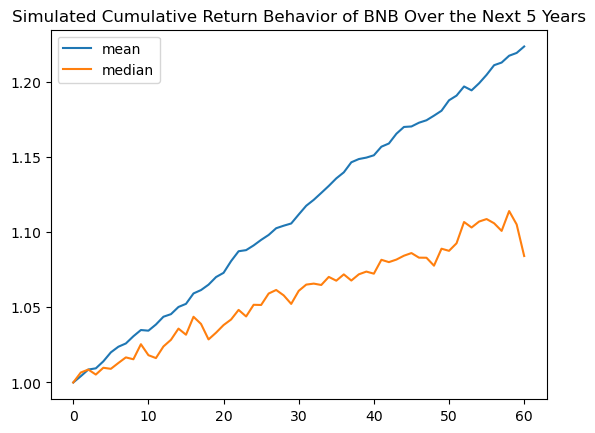

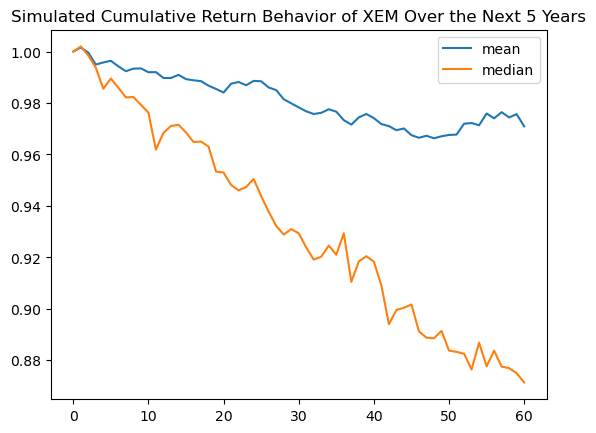

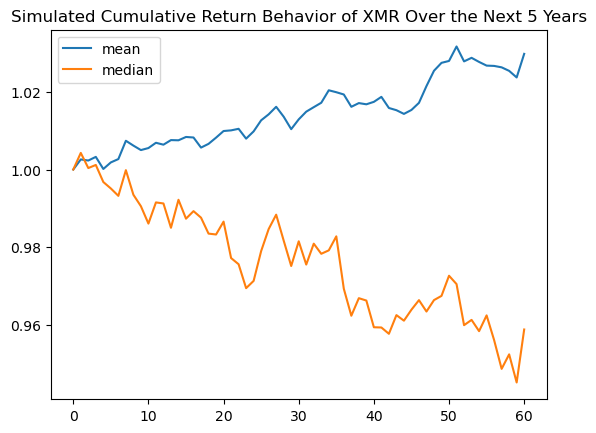

In [18]:
# Use the 'plot' function to create a chart of the simulated profits/losses
btc_simulated_returns[['mean','median']].plot(title="Simulated Cumulative Return Behavior of BTC Over the Next 5 Years")
eth_simulated_returns[['mean', 'median']].plot(title="Simulated Cumulative Return Behavior of ETH Stock Over the Next 5 Years")
doge_simulated_returns[['mean', 'median']].plot(title="Simulated Cumulative Return Behavior of DOGE Over the Next 5 Years")
bnb_simulated_returns[['mean', 'median']].plot(title="Simulated Cumulative Return Behavior of BNB Over the Next 5 Years")
xem_simulated_returns[['mean', 'median']].plot(title="Simulated Cumulative Return Behavior of XEM Over the Next 5 Years")
xmr_simulated_returns[['mean', 'median']].plot(title="Simulated Cumulative Return Behavior of XMR Over the Next 5 Years")

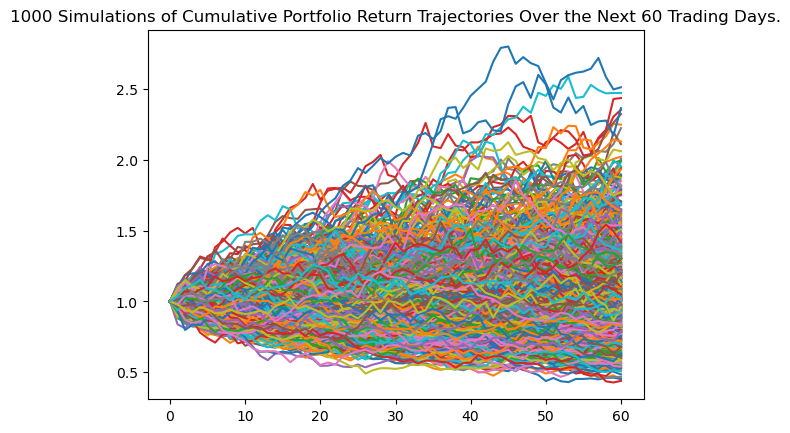

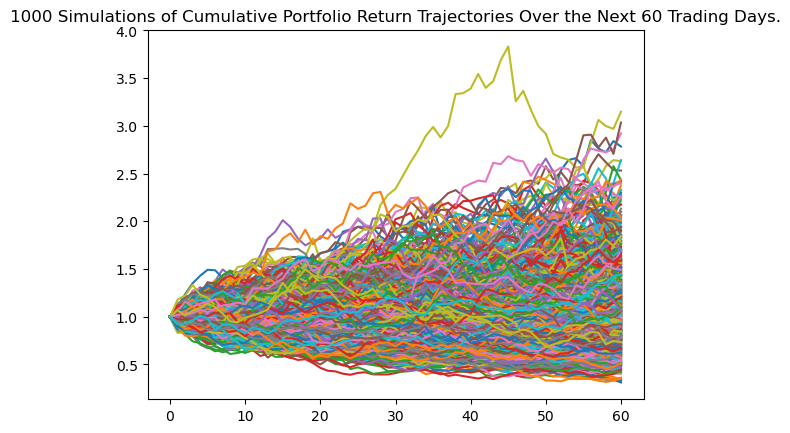

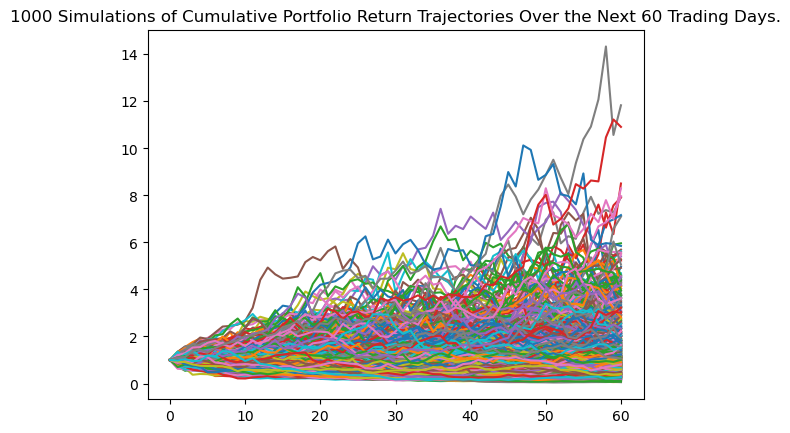

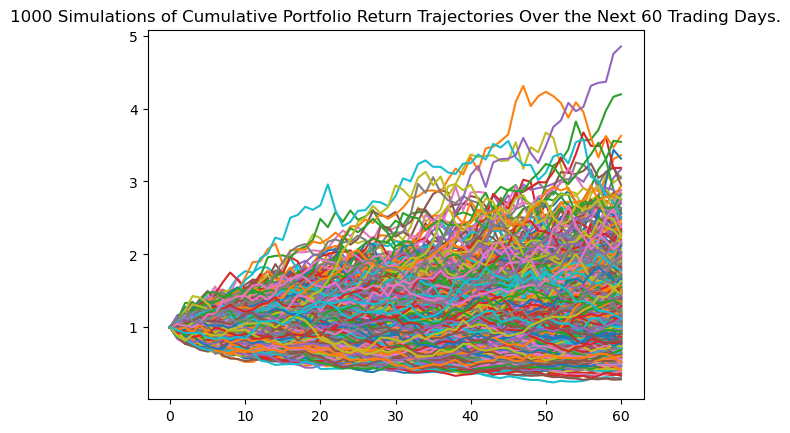

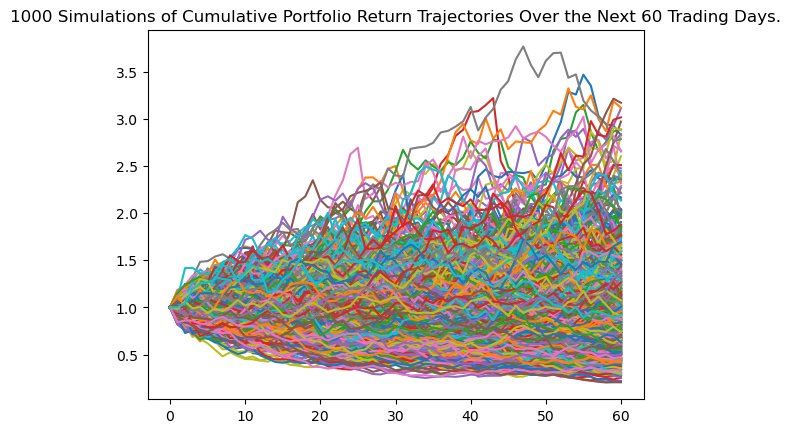

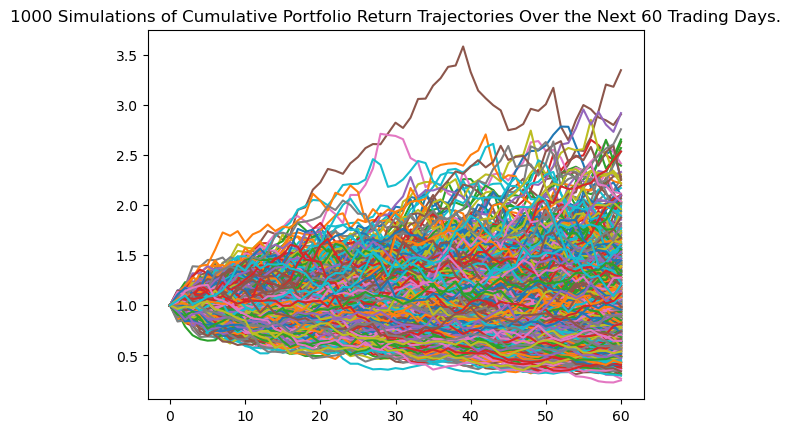

In [19]:
btc_line_plot = mc_btc.plot_simulation()
eth_line_plot = mc_eth.plot_simulation()
doge_line_plot = mc_doge.plot_simulation()
bnb_line_plot = mc_bnb.plot_simulation()
xem_line_plot = mc_xem.plot_simulation()
xmr_line_plot = mc_xmr.plot_simulation()

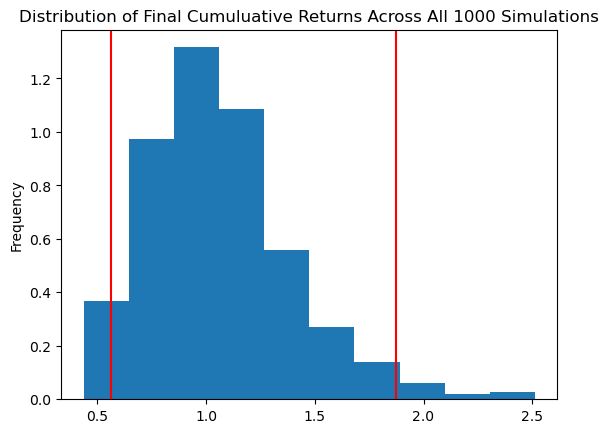

In [20]:
btc_dist_plot = mc_btc.plot_distribution()

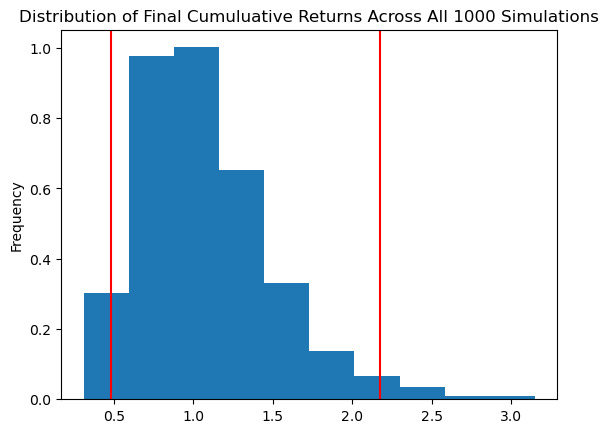

In [21]:
eth_dist_plot = mc_eth.plot_distribution()

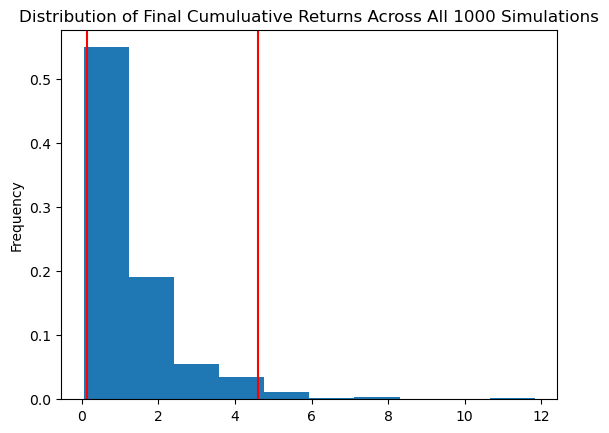

In [22]:
doge_dist_plot = mc_doge.plot_distribution()

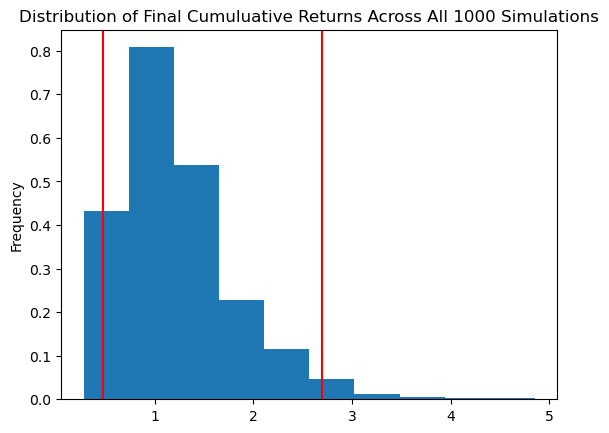

In [23]:
bnb_dist_plot = mc_bnb.plot_distribution()

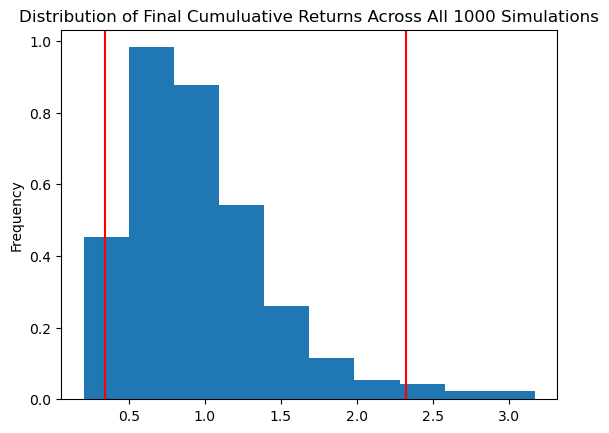

In [24]:
xem_dist_plot = mc_xem.plot_distribution()

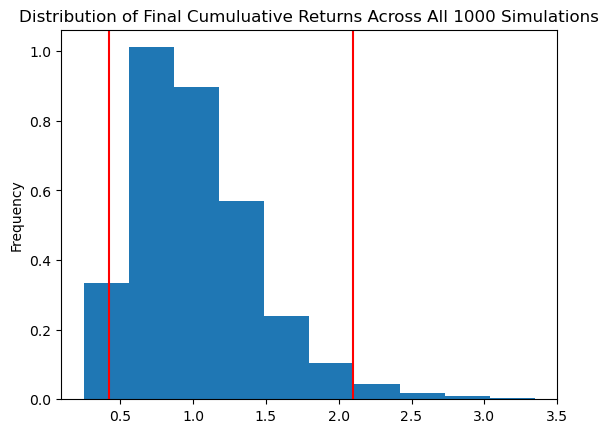

In [25]:
xmr_dist_plot = mc_xmr.plot_distribution()

In [26]:
# Fetch summary statistics from the Monte Carlo simulation results
btc_tbl = mc_btc.summarize_cumulative_return()
eth_tbl = mc_eth.summarize_cumulative_return()
doge_tbl = mc_doge.summarize_cumulative_return()
bnb_tbl = mc_bnb.summarize_cumulative_return()
xem_tbl = mc_xem.summarize_cumulative_return()
xmr_tbl = mc_xmr.summarize_cumulative_return()
# Print summary statistics
print(btc_tbl)

count           1000.000000
mean               1.065060
std                0.332065
min                0.438323
25%                0.827761
50%                1.019025
75%                1.224441
max                2.512143
95% CI Lower       0.563638
95% CI Upper       1.873290
Name: 60, dtype: float64


In [27]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of $10,000 investment
# BTC
btc_ci_lower = round(btc_tbl[8]*10000,2)
btc_ci_upper = round(btc_tbl[9]*10000,2)

# ETH
eth_ci_lower = round(eth_tbl[8]*10000,2)
eth_ci_upper = round(eth_tbl[9]*10000,2)

# DOGE
doge_ci_lower = round(doge_tbl[8]*10000,2)
doge_ci_upper = round(doge_tbl[9]*10000,2)

# BNB
bnb_ci_lower = round(bnb_tbl[8]*10000,2)
bnb_ci_upper = round(bnb_tbl[9]*10000,2)

# XEM
xem_ci_lower = round(xem_tbl[8]*10000,2)
xem_ci_upper = round(xem_tbl[9]*10000,2)

# XMR
xmr_ci_lower = round(xmr_tbl[8]*10000,2)
xmr_ci_upper = round(xmr_tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in BTC"
      f" over the next 5 years will end within in the range of"
      f" ${btc_ci_lower} and ${btc_ci_upper}.")
print(f"There is a 95% chance that an initial investment of $10,000 in ETH"
      f" over the next 5 years will end within in the range of"
      f" ${eth_ci_lower} and ${eth_ci_upper}.")
print(f"There is a 95% chance that an initial investment of $10,000 in DOGE"
      f" over the next 5 years will end within in the range of"
      f" ${doge_ci_lower} and ${doge_ci_upper}.")
print(f"There is a 95% chance that an initial investment of $10,000 in BNB"
      f" over the next 5 years will end within in the range of"
      f" ${bnb_ci_lower} and ${bnb_ci_upper}.")
print(f"There is a 95% chance that an initial investment of $10,000 in XEM"
      f" over the next 5 years will end within in the range of"
      f" ${xem_ci_lower} and ${xem_ci_upper}.")
print(f"There is a 95% chance that an initial investment of $10,000 in XMR"
      f" over the next 5 years will end within in the range of"
      f" ${xmr_ci_lower} and ${xmr_ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in BTC over the next 5 years will end within in the range of $5636.38 and $18732.9.
There is a 95% chance that an initial investment of $10,000 in ETH over the next 5 years will end within in the range of $4828.28 and $21745.5.
There is a 95% chance that an initial investment of $10,000 in DOGE over the next 5 years will end within in the range of $1453.25 and $45894.3.
There is a 95% chance that an initial investment of $10,000 in BNB over the next 5 years will end within in the range of $4760.37 and $27000.76.
There is a 95% chance that an initial investment of $10,000 in XEM over the next 5 years will end within in the range of $3419.24 and $23191.28.
There is a 95% chance that an initial investment of $10,000 in XMR over the next 5 years will end within in the range of $4217.63 and $21002.43.


In [52]:
# Reading Fear and Greed CSV
fear = Path("../fintech_project_1/fear.csv")
fear_df = pd.read_csv(fear, index_col='date')
fear_df.head()

value
date            
1/02/2018     30
2/02/2018     15
3/02/2018     40
4/02/2018     24
5/02/2018     11

In [56]:
# Use yahoofinance API to pull BTC data and clean dataframe
btc_clean = yf.download("BTC-USD" 
                   , start="2018-02-01", end="2022-11-02")

btc_clean.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
btc_clean.index = btc_clean.index.strftime('%d/%m/%Y')
btc_clean.head()

[*********************100%***********************]  1 of 1 completed


Close
Date                   
01/02/2018  9170.540039
02/02/2018  8830.750000
03/02/2018  9174.910156
04/02/2018  8277.009766
05/02/2018  6955.270020

In [61]:
btc_fear_df = pd.merge(btc_clean, fear_df, left_index=True, right_index=True)
btc_fear_df.head()

Close  value
10/02/2018  8621.900391     54
11/02/2018  8129.970215     31
12/02/2018  8926.570312     42
13/02/2018  8598.309570     35
14/02/2018  9494.629883     55

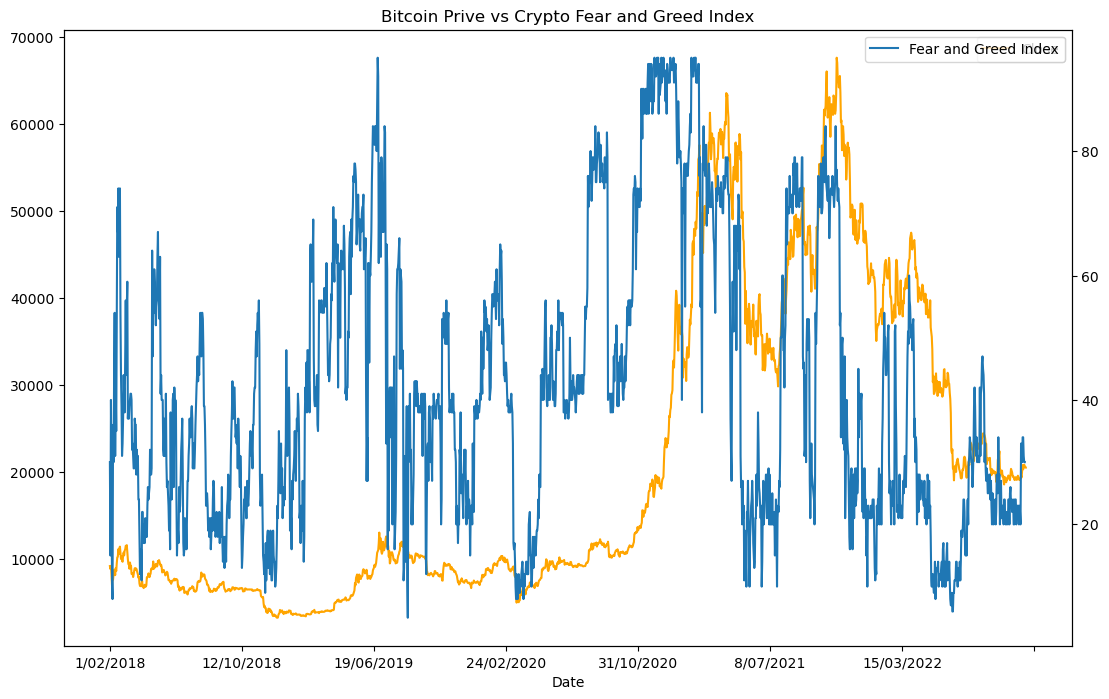

In [75]:
ax1 = btc_clean.plot(color='orange', figsize=(12,7), title = "Bitcoin Prive vs Crypto Fear and Greed Index")
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1.0))
fear_df.plot(ax=ax2, figsize=(13,8))
plt.legend(["Fear and Greed Index"])